# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `7` | `Questions`

> Hi, Team. 👋

> The exercise questions ask you to solve three bigger questions. As with our previous exercise problem sets, while answering the questions you will be able to incorporate what you learned in class and consolidate your understanding.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [29]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 <font color = "purple"> Bigger Question 1. 

> Here's something that's familiar to you, with a few minor tweaks.

### Please create a predictive model for the weekly return of AMZN stock. You will use supervised learning for your predictive modelling.

> As you learned in class, to do this it is essential to know what factors are related to Amazon’s stock price, and to incorporate as much information as you can into the model.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as features here.

    Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of Amazon (AMZN). The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
* <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
<br>    
    
> For `input features` (`predictors`; `Xs`), we use (The variables used as predictors are as follows) ...

> `Correlated assets`

* lagged five-day returns of stocks (AAPL, MSFT, F);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of AMZN.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages.

    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this exercise, hyperparameter tuning won’t be requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

> The metric for assessing model performance will be mean squared error (`MSE`).
<br>

> Show which of the algorithms perform relatively better by a comparison visualization of performance, for both the training and testing sets learned in class. 

    Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

### Below are the lines of code that lead to an answer:

In [3]:
# Loading Algorithm

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

# for data split
from sklearn.model_selection import train_test_split

# for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for assessment
from sklearn.metrics import mean_squared_error

# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm


from pandas.plotting import scatter_matrix

# for Pre-processing (Feature Engineering)
from sklearn.preprocessing import StandardScaler

# assumption checks for Time-Series
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
tickers = [
    'AMZN',
    'AAPL', 
    'MSFT', 
    'F',
    'USDJPY=X',
    'GBPUSD=X',
    '^GSPC',
    '^DJI',
    '^VIX'
]

closes = (
    yf.download(
        tickers = tickers,
    )
    ['Adj Close']
    .dropna()
)

[*********************100%***********************]  9 of 9 completed


In [5]:
lags = 5

for ticker in ['AAPL', 'MSFT', 'F', 'AMZN']:    
    closes[f'lag_{lags}_{ticker}'] = (
        closes[ticker]
        .pct_change()
        .shift(lags)
    )
    
lags = [5, 15, 30, 60]

for lag in lags:
    closes[f'lag_{lag}_AMZN'] = (
        closes['AMZN']
        .pct_change()
        .shift(lag)
    )

ma_windows = [21, 63, 252]
ewma_windows = [10, 30, 200]

for ticker in tickers:
    for ma in ma_windows:
        closes[f'{ma}_MA_{ticker}'] = (
            closes[ticker]
            .rolling(ma)
            .mean()
        )
    for ema in ewma_windows:
        closes[f'{ema}_EMA_{ticker}'] = (
            closes[ticker]
            .ewm(ema)
            .mean()
        )

closes['y'] = (
    closes['AMZN']
    .pct_change(5)
)

X = (
    closes
    .dropna()
    [[col for col in closes.columns if col not in tickers + ['y']]]
)

Y = (
    closes
    .dropna()
    ['y']
)

len(X) == len(Y)

True

## Train Test Split

In [6]:
validation_size = 0.25

train_size =\
    int(len(X) 
        * 
        (1 - validation_size)
       )

X_train, X_test =\
    (X[0         :train_size], 
     X[train_size:len(X)    ]
    )

Y_train, Y_test =\
    (Y[0         :train_size], 
     Y[train_size:len(X)    ]
    )

## Model

In [7]:
num_folds = 10
seed = 241001
scoring = "neg_mean_squared_error"

models = []

In [8]:
models.append(("LR", LinearRegression()
             )
            )

models.append(("LASSO", Lasso()
             )
            )

models.append(("EN", ElasticNet()
             )
            )

models.append(("CART", DecisionTreeRegressor()
             )
            )

models.append(("KNN", KNeighborsRegressor()
             )
            )

models.append(("SVR", SVR()
             )
            )

# Bagging (Boostrap Aggregation)

models.append(("RFR", RandomForestRegressor()
              )
             )

models.append(("ETR", ExtraTreesRegressor()
              )
             )

# Boosting

models.append(("GBR", GradientBoostingRegressor()
              )
             )

models.append(("ABR", AdaBoostRegressor()
              )
             )


In [9]:
# Gift for you

# Team, let me guide you through this step-by-step

### Initialization of Lists:

names = []

kfold_results = []

train_results = []
test_results = []

# Four empty lists are initialized. 
# names will store the names of the models, 
# kfold_results will store the cross-validation results, 
# train_results and test_results 
# will store the performance of the models 
# on the training and testing datasets, respectively.

### Looping through Models:

# Let's iterate over a list of models. 

# Each element in the models list is a tuple 
# containing the name of the model (name) and the model object (model).

for name, model in models:
    
### Appending Model Names:

# The name of the current model is appended to the names list.

    names.append(name)
    
### Let's run K-fold Cross-Validation
    
    kfold =\
        (KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        )
    
# A KFold object is created with a specified number of splits (num_folds), 
# a random seed (seed), 
# and shuffling enabled.
    
### Running Cross-Validation:
# Let's convert MSE to positive (Here, now it becomes lower the better; See below)

    cv_results =\
        (
         -1
         *
         cross_val_score(model, X_train, Y_train,
                         cv = kfold,
                         scoring = scoring)
        )
        
# Cross-validation is performed on the training data (X_train, Y_train) using the current model. 
# The negative mean squared error is used 
# as the scoring metric 
# (hence multiplied by -1 to make it positive, 
# as the convention is that higher scores are better).

# Storing Cross-Validation Results:
 
### The cross-validation results for the current model are appended to the kfold_results list.    
    
    kfold_results.append(cv_results)

# Fitting the Model on the Entire Training Set:
  
    res = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

### Evaluating Model on Training Set:

# The trained model’s predictions on the training set are evaluated 
# using the mean squared error, and the result is appended to train_results.

    train_result = mean_squared_error(res.predict(X_train), Y_train)
    
    train_results.append(train_result)

## Evaluating Model on Testing Set:    
    
# Similarly, the model’s performance is evaluated 
# on the testing set and appended to test_results.
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    
    test_results.append(test_result)
    
# Printing the Results:

# The name of the model, 
# the average cross-validation score, 
# the standard deviation of the cross-validation scores, 
# the training set performance, 
# and the testing set performance are printed out.

    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
                                     cv_results.std(), 
                                     train_result, 
                                     test_result)
    print(message)

LR: 0.002591 (0.000318) 0.002477 0.514211
LASSO: 0.002823 (0.000356) 0.002820 0.002435


C:\Users\Edmund\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.112e-03, tolerance: 9.673e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Edmund\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.371e-03, tolerance: 9.487e-04
  model = cd_fast.enet_coordinate_descent(


EN: 0.002821 (0.000355) 0.002816 0.002444
CART: 0.002212 (0.000389) 0.000000 0.007427
KNN: 0.001284 (0.000242) 0.000597 0.002607
SVR: 0.002869 (0.000338) 0.002843 0.006871
RFR: 0.001257 (0.000190) 0.000151 0.006980
ETR: 0.000830 (0.000141) 0.000000 0.003982
GBR: 0.002129 (0.000149) 0.001646 0.012458
ABR: 0.002476 (0.000197) 0.002267 0.002462


In [10]:
modelARIMA =\
(    stats
     .ARIMA(endog = Y_train,
                exog = X_train,
                order = [1, 0, 0]
            )
)

model_fit = modelARIMA.fit()

error_training_ARIMA =\
(    mean_squared_error(Y_train,
                       model_fit.fittedvalues)
)

predicted =\
(
    model_fit
    .predict(start = len(X_train) - 1,
             end = len(X) - 1,
             exog = X_test)[1: ]
)

error_testing_ARIMA =\
(    mean_squared_error(Y_test,
                        predicted)
)

error_testing_ARIMA

test_results.append(error_testing_ARIMA)

train_results.append(error_training_ARIMA)

names.append("ARIMA")

C:\Users\Edmund\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Edmund\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Edmund\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Edmund\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

### <font color = red> Answer 1 is presented in the cell below: </font>

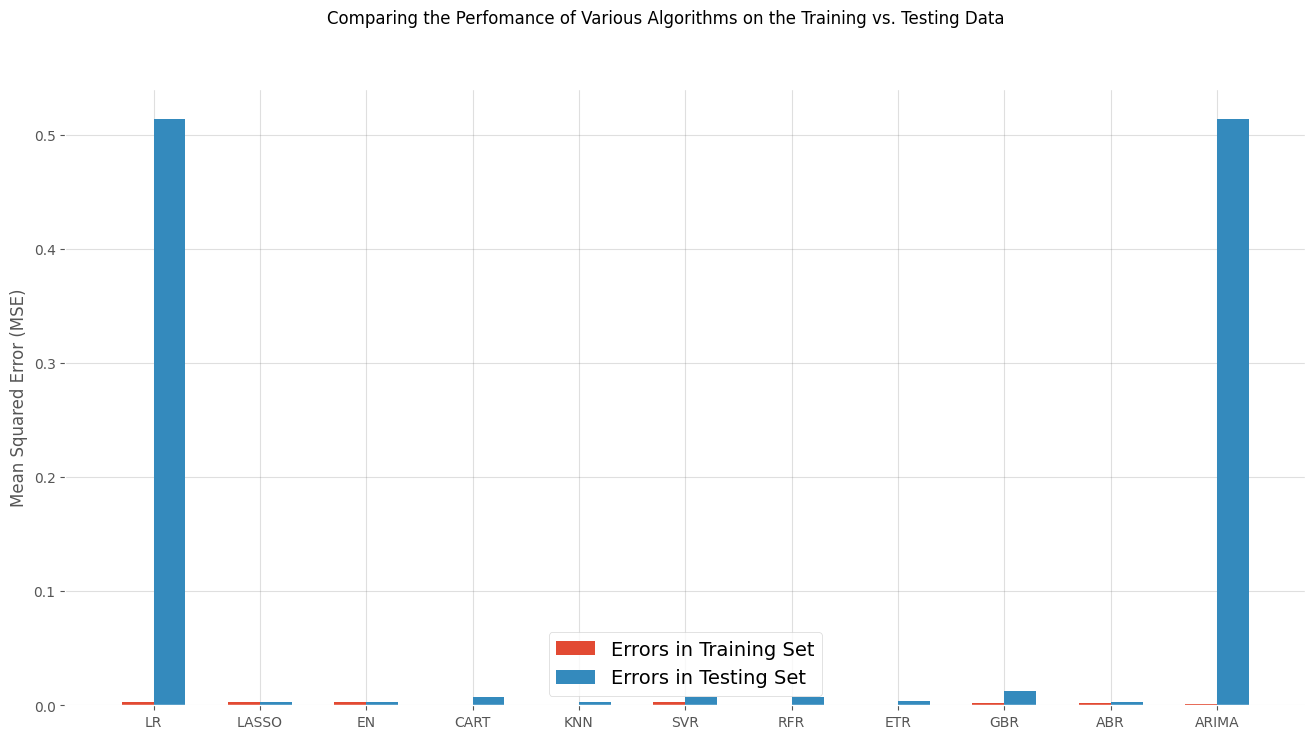

In [11]:
fig = plt.figure(figsize = [16, 8])

ind = np.arange(len(names)
               )

width = 0.30

fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")

ax = fig.add_subplot(111)

(plt
 .bar(ind - width/2,
    
      # Team, this line calculates the starting x position of the bars 
      # representing "Errors in Training Set". 
      # The width/2 term is used to shift the bars to the left, 
      # so they are centered around the tick mark for each group (algorithm) on the x-axis.
      
      # The bar chart will have two sets of bars for each algorithm: 
      # one for training errors and one for testing errors. 
      
      # By subtracting width/2 from ind, 
      # the training error bars are positioned to the left of the center of the tick marks. 
      
      train_results,
      width = width,
      label = "Errors in Training Set")
)

(plt
 .bar(ind + width/2,
      test_results,
      width = width,
      label = "Errors in Testing Set")
)

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error (MSE)")

plt.show()

## <font color = blue> 👉 Questions 2 to 5 ask you to build, execute, and backtest a mean-reversion strategy, using `Relative Strength Index` (`RSI`). </font>

#### The Relative Strength Index (RSI) is an indicator that uses the closing prices of an asset to identify oversold and overbought conditions. 

> Most commonly, RSI is calculated using a 14-day period, and measured on a scale from zero to 100. (It is an oscillator.)

> Traders usually buy an asset when it is oversold (when its RSI is below 30) and sell when it is overbought (when its RSI is above 70). 

> More extreme overbought and oversold levels, such as 80 and 20, are used less frequently, and imply stronger momentum.

#### You are asked to build a trading strategy with the following set of rules.

### <font color = green> NOTE: Apple (`AAPL`) as our security of interest. The `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade.

- You can go long and short.
<br>

- To calculate RSI, use 14 periods (trading days).
<br>

- Enter a long position if RSI crosses the lower threshold (standard value of 30), moving upwards. Exit the position when RSI becomes higher than the middle level (value of 50).
<br>

- Enter a short position if RSI crosses the upper threshold (standard value of 70), moving downwards. Exit the position when RSI becomes less than 50.
<br>

- Only one position can be open at a time.

### <font color = green> NOTE: The RSI is defined as follows:
    
### Calculating the RSI first requires the RS which requires an average value of n-many previous trading days. 
<br>
    
- As discussed, a value of 14 days is common for the RSI calculation. 
<br>
    
- The first RS value requires the price from all 14 of the first trading days. Often, this is a source of confusion with the RSI given successive values only require the most recent. 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value to calculate the next average value 
    by multiplying by our lookback period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

### Visualize your buy and sell positions.

# <font color = 'red'> PROF Code </font>

In [30]:
data_aapl = (
    yf.download(
        'AAPL',
        start = pd.Timestamp(2015, 1, 1),
        end = pd.Timestamp(2017, 12, 31)
    )
    ['Adj Close']
)

data_aapl

[*********************100%***********************]  1 of 1 completed


Date
2015-01-02    24.373959
2015-01-05    23.687305
2015-01-06    23.689537
2015-01-07    24.021719
2015-01-08    24.944687
                ...    
2017-12-22    41.216587
2017-12-26    40.170925
2017-12-27    40.177994
2017-12-28    40.291035
2017-12-29    39.855335
Name: Adj Close, Length: 755, dtype: float64

## <font color = 'red'> PROF RSI <font>

In [31]:
price_change = (
    data_aapl
    .diff()
    .iloc[1 : ]
)

price_change

Date
2015-01-05   -0.686653
2015-01-06    0.002232
2015-01-07    0.332182
2015-01-08    0.922968
2015-01-09    0.026751
                ...   
2017-12-22    0.000000
2017-12-26   -1.045662
2017-12-27    0.007069
2017-12-28    0.113041
2017-12-29   -0.435699
Name: Adj Close, Length: 754, dtype: float64

In [32]:
gain = (
    price_change
    .clip(lower = 0)
)

loss = (
    price_change
    .clip(upper = 0)
    .abs()
)

gain_loss = (
    pd.concat(
        [
            gain,
            loss
        ],
        axis = 1
    )
)

g_rs_init, l_rs_init = (
    gain_loss
    .iloc[ : 14]
    .mean()
    .values
)

rs_init = (
    g_rs_init / l_rs_init
)

In [33]:
g_rs = g_rs_init
l_rs = l_rs_init

init_date = gain_loss.index[13]
init_date_plus_one = gain_loss.index[14]

gl_rs_df = (
    pd.DataFrame(
        {
            init_date: [g_rs, l_rs]
        },
        index = ['gain_rs', 'loss_rs']
    )
    .T
)

for d, (g, l) in gain_loss.loc[init_date_plus_one: ].iterrows():
    g_rs = (
        (
            (g_rs * 13) + g
        ) / 14
    )
    
    l_rs = (
        (
            (l_rs * 13) + l
        ) / 14
    )
    
    gl_rs_df.loc[d] = [g_rs, l_rs]
    
gl_rs_df

,gain_rs,loss_rs
2015-01-23,0.218480,0.160357
2015-01-26,0.204785,0.148903
2015-01-27,0.190158,0.201326
2015-01-28,0.274828,0.186946
2015-01-29,0.312365,0.173593
...,...,...
2017-12-22,0.164145,0.106896
2017-12-26,0.152421,0.173950
2017-12-27,0.142038,0.161525
2017-12-28,0.139967,0.149988


In [34]:
rs  = (
    gl_rs_df['gain_rs']
    /
    gl_rs_df['loss_rs']
)

rsi = (
    100 - 100 / (1 + rs)
)

rsi

2015-01-23    57.671275
2015-01-26    57.899967
2015-01-27    48.573540
2015-01-28    59.515692
2015-01-29    64.278222
                ...    
2017-12-22    60.561061
2017-12-26    46.701642
2017-12-27    46.790291
2017-12-28    48.272017
2017-12-29    43.270467
Length: 741, dtype: float64

## <font color = 'red'> Detect `RSI` Signal </font>

In [35]:
rsi_up = (
    rsi
    .diff()
    > 0
)

rsi_down = (
    rsi
    .diff()
    < 0 
)

crossed_70 = (
    np.sign(
        (rsi - 70) 
        * 
        (rsi - 70).shift(1)
    )
    .fillna(1)
    == -1
)

crossed_50 = (
    np.sign(
        (rsi - 50) 
        * 
        (rsi - 50).shift(1)
    )
    .fillna(1)
    == -1
)

crossed_30 = (
    np.sign(
        (rsi - 30) 
        * 
        (rsi - 30).shift(1)
    )
    .fillna(1)
    == -1
)

In [36]:
buy = rsi_up & crossed_30
unwind = crossed_50
sell = rsi_down & crossed_70

In [37]:
position_series = (
    pd.Series(
        np.nan
    )
    .reindex(rsi.index)
)

position_series[buy] = 1
position_series[unwind] = 0
position_series[sell] = -1

position_series.iloc[0] = 0
position_series = position_series.ffill()

position_series.name = 'position'
position_series

2015-01-23    0.0
2015-01-26    0.0
2015-01-27    0.0
2015-01-28    0.0
2015-01-29    0.0
             ... 
2017-12-22    0.0
2017-12-26    0.0
2017-12-27    0.0
2017-12-28    0.0
2017-12-29    0.0
Name: position, Length: 741, dtype: float64

In [38]:
buy_unwind = position_series.clip(lower = 0)
buy_once = buy_unwind.diff() == 1
unwind_buy = buy_unwind.diff() == -1

sell_unwind = position_series.clip(upper = 0)
sell_once = sell_unwind.diff() == -1
unwind_sell = sell_unwind.diff() == 1

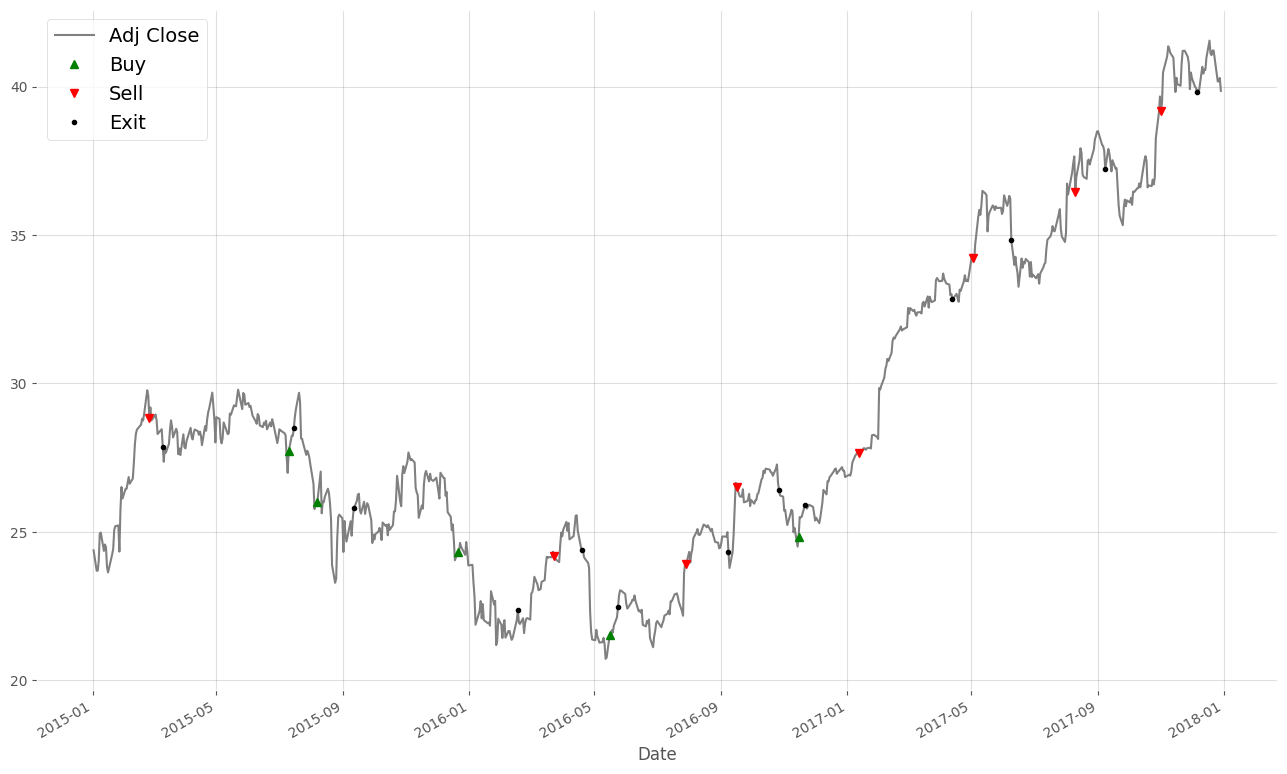

In [39]:
fig, ax = (
    plt.subplots(figsize = [16, 10])
)

data_aapl.plot(ax = ax, color = 'grey')

aapl_point = (
    data_aapl
    .reindex(position_series.index)
)

plt.plot(aapl_point[buy_once], 'g^', label = 'Buy')
plt.plot(aapl_point[sell_once], 'rv', label = 'Sell')
plt.plot(aapl_point[unwind_sell | unwind_buy], 'k.', label = 'Exit')

plt.legend()

In [40]:
unwind_once = unwind_buy | unwind_sell

buy_once.name = 'buy'
unwind_once.name = 'exit'
sell_once.name = 'sell'

to_sim_df = (
    pd.concat(
        [
            buy_once,
            unwind_once,
            sell_once,
            data_aapl
        ],
        axis = 1
    )
    .dropna()
)

to_sim_df

,buy,exit,sell,Adj Close
2015-01-23,False,False,False,25.187683
2015-01-26,False,False,False,25.214436
2015-01-27,False,False,False,24.331602
2015-01-28,False,False,False,25.707142
2015-01-29,False,False,False,26.507486
...,...,...,...,...
2017-12-22,False,False,False,41.216587
2017-12-26,False,False,False,40.170925
2017-12-27,False,False,False,40.177994
2017-12-28,False,False,False,40.291035


## <font color = 'red'> Compute Portfolio </font>

In [41]:
init_cap = 100_000
position = 0
stock_to_buy = 1_000
fee = 5

cash_pos_dict = {}
cap = init_cap

for d, (b, u, s, p) in to_sim_df.iterrows():
    if b:
        cap -= p * stock_to_buy
        cap -= fee
        position = stock_to_buy
    if u:
        cap += p * position
        cap -= fee
        position = 0
    if s:
        cap += p * stock_to_buy
        cap -= fee
        position = -stock_to_buy

        
    cash_pos_dict[d] = cap, position

In [42]:
simulated = (
    pd.DataFrame(
        cash_pos_dict,
        index = ['capital', 'position']
    )
    .T
)

simulated['position'] = simulated['position'] * data_aapl

In [43]:
tri = simulated.sum(1)
(
    "{:.2f}%"
    .format(
        (tri[-1] / tri[0] - 1) * 100
    )
)

'-6.27%'

In [44]:
from src import backtest

In [45]:
test = backtest.backtest(
    dates = data_aapl.index[14:],
    capital = init_cap,
    commissions = fee,
    positions_arr = position_series.to_numpy(),
    prices_arr = data_aapl[14:].to_numpy()
).run(shares_to_buy = stock_to_buy)

## <font color = 'red'> Drawdown Analysis </font>

In [46]:
def obtain_drawdown(series):
    series.index = series.index.set_names('Date')
    return (series / series.cummax()) - 1

def calculate_drawdown_stats(df):
    if df.shape[0] == 1:
        return None
    
    drawdown_value = df.iloc[ : , 1]
    
    series_d = {
        'Date': df['Date'].min(),
        'Drawdown Length (Days)': df['Date'].max() - df['Date'].min(),
        'Drawdown Length (Business Days)': pd.Timedelta(df.count().iloc[0] - 1, 'd'),
        'Max Drawdown (%)': drawdown_value.min() * 100
    }
    
    return pd.Series(series_d)

def analyze_drawdown(drawdown_series):
    drawdown_df = pd.DataFrame(drawdown_series)
    drawdown_df['drawdown_period_group'] = (drawdown_df == 0).cumsum()
    
    drawdown_stats_groupy = (
        drawdown_df
        .reset_index()
        .groupby('drawdown_period_group')
    )
    
    drawdown_stats = (
        drawdown_stats_groupy
        .apply(calculate_drawdown_stats)
    )
    
    drawdown_stats = (
        drawdown_stats
        .dropna()
        .set_index(['Date'])
    )
    
    return drawdown_stats


In [47]:
drawdown = obtain_drawdown(tri)
analyze_drawdown(drawdown)

,Drawdown Length (Days),Drawdown Length (Business Days),Max Drawdown (%)
Date,,,
2015-02-24,2 days,2 days,-0.369822
2015-02-27,5 days,3 days,-0.201293
2015-03-05,4 days,2 days,-0.162533
2015-07-09,1 days,1 days,-0.004953
2015-07-13,1 days,1 days,-0.011071
2015-08-05,1 days,1 days,-0.004915
2015-08-10,872 days,603 days,-10.297450


## <font color = 'red'> Annual Returns </font>

In [48]:
tri_df = tri.to_frame()
tri_df['year'] = (
    tri_df
    .index
    .year
)
tri_df.columns = ['tri', 'year']

In [49]:
yearly_returns = (
    tri_df
    .groupby('year')
    ['tri']
    .apply(
        lambda x: (x.iloc[-1] / x.iloc[0] - 1)
    )
)

yearly_returns

year
2015    0.010415
2016   -0.000877
2017   -0.071717
Name: tri, dtype: float64

## <font color = 'red'> Sharpe </font>

In [50]:
(
    tri
    .pct_change()
    .mean()
    /
    tri
    .pct_change()
    .std()
    *
    np.sqrt(252 / tri.shape[0])
)

-0.019033835450976724

### Below are the lines of code that lead to an answer:

In [61]:
AAPL = (
    yf.download(
        'AAPL', 
        start = '2014-12-31',
        end = '2017-12-31'
    )
    [['Adj Close']]
    .rename(
        columns = {
            'Adj Close' : 'AAPL'
        }
    )
)

[*********************100%***********************]  1 of 1 completed


In [62]:
def RSI(array, n):

    Gain = pd.Series(array).diff().fillna(0)
    Loss = Gain.copy()

    Gain[Gain < 0] = 0
    Loss[Loss > 0] = 0
    
    RS =\
    (
        Gain.rolling(n, min_periods = n).mean()
        /
        Loss.abs().rolling(n, min_periods = n).mean()
    )
    
    return (100 - 100 / (1 + RS)).to_numpy()

In [63]:
AAPL['RSI_14'] = (
    RSI(
        AAPL['AAPL'].values,
        14
    )
)

position = np.zeros(len(AAPL))
RSI = AAPL['RSI_14'].values

for i in range(len(AAPL)):
    if RSI[i] > 30 and RSI[i - 1] < 30:
        position[i] = 1
    elif RSI[i] < 70 and RSI[i-1] > 70:
        position[i] = -1
    else:
        position[i] = position[i - 1]
        
    if position[i] == 1 and RSI[i] > 50:
        position[i] = 0
        
    if position[i] == -1 and RSI[i] < 50:
        position[i] = 0

AAPL['trading_position'] = position

AAPL['signal'] = AAPL['trading_position'].diff()

### <font color = red> Answer 2 is presented in the cell below: </font>

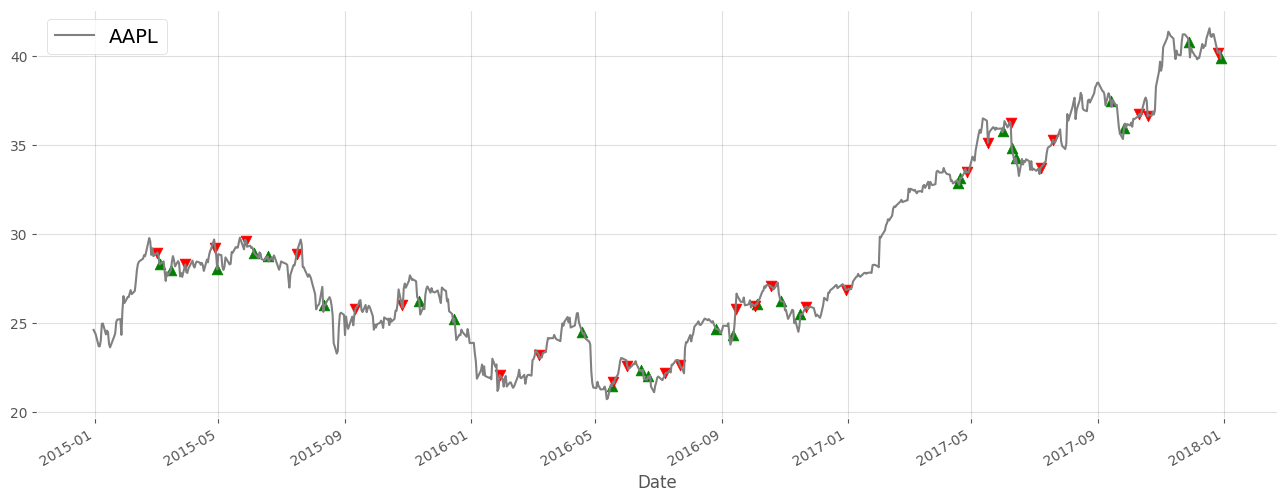

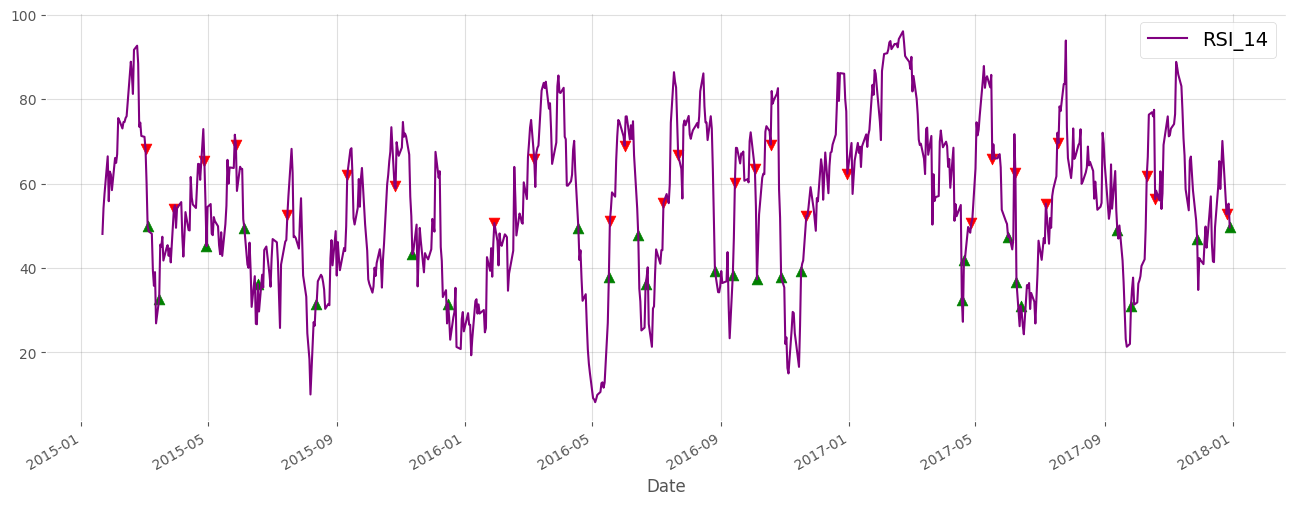

In [15]:
(
    AAPL
    [['AAPL']]
    .plot(
        figsize = [16,6], 
        color = 'grey'
    )
)

plt.scatter(
    x = AAPL[AAPL['signal'] == 1].index, 
    y = AAPL[AAPL['signal'] == 1]['AAPL'], 
    marker = '^',
    s = 60,
    color = 'green'
)

plt.scatter(
    x = AAPL[AAPL['signal'] == -1].index, 
    y = AAPL[AAPL['signal'] == -1]['AAPL'], 
    marker = 'v',
    s = 60,
    color = 'red'
)


(
    AAPL
    [['RSI_14']]
    .plot(
        figsize = [16,6], 
        color = 'purple'
    )
)

plt.scatter(
    x = AAPL[AAPL['signal'] == 1].index, 
    y = AAPL[AAPL['signal'] == 1]['RSI_14'], 
    marker = '^',
    s = 60,
    color = 'green'
)

plt.scatter(
    x = AAPL[AAPL['signal'] == -1].index, 
    y = AAPL[AAPL['signal'] == -1]['RSI_14'], 
    marker = 'v',
    s = 60,
    color = 'red'
)

### <font color = blue> 👉 Question 3</font>. How much in cumulative returns could you have had as a result of the RSI strategy?

### Below are the lines of code that lead to an answer:

In [16]:
capital = 1e5
commission = 5

position = (
    pd
    .DataFrame(index = AAPL.index)
    .fillna(0.0)
)

position["AAPL"] = (
    5_000
    *
    AAPL['trading_position'].fillna(0)
)

comms_arr = np.zeros(len(position))
position_arr = AAPL['trading_position'].values

for i in range(len(position_arr)):
    if position_arr[i] != position_arr[i-1]:
        comms_arr[i] = -commission
    else:
        continue

portfolio = (
    position[['AAPL']]
    .multiply(
        AAPL['AAPL'], 
        axis = 0
    )
)

portfolio['trading_position'] = AAPL['trading_position']
portfolio['comms'] = comms_arr.cumsum()

difference_in_shares_owned = (
    position[['AAPL']]
    .diff()
)

portfolio["our_holdings"] = (
    position[['AAPL']]
    .multiply(AAPL['AAPL'],
            axis = 0)
).sum(axis = 1)

portfolio["our_cash"] = (
    capital 
    - 
    (
        difference_in_shares_owned
        .multiply(AAPL['AAPL'], axis = 0)
        .sum(axis = 1)
    )
    .cumsum()
    +
    portfolio['comms']
)

portfolio["total"] = portfolio["our_cash"] + portfolio["our_holdings"]

portfolio["returns"] = (
    portfolio
    ["total"]
    .pct_change()
    .fillna(0)
)

portfolio['cumulative_returns'] = (
    (
        portfolio
        ['returns'] 
        + 1
    )
    .cumprod()
)

Date
2017-12-29    0.427597
Name: cumulative_returns, dtype: float64


<Axes: xlabel='Date'>

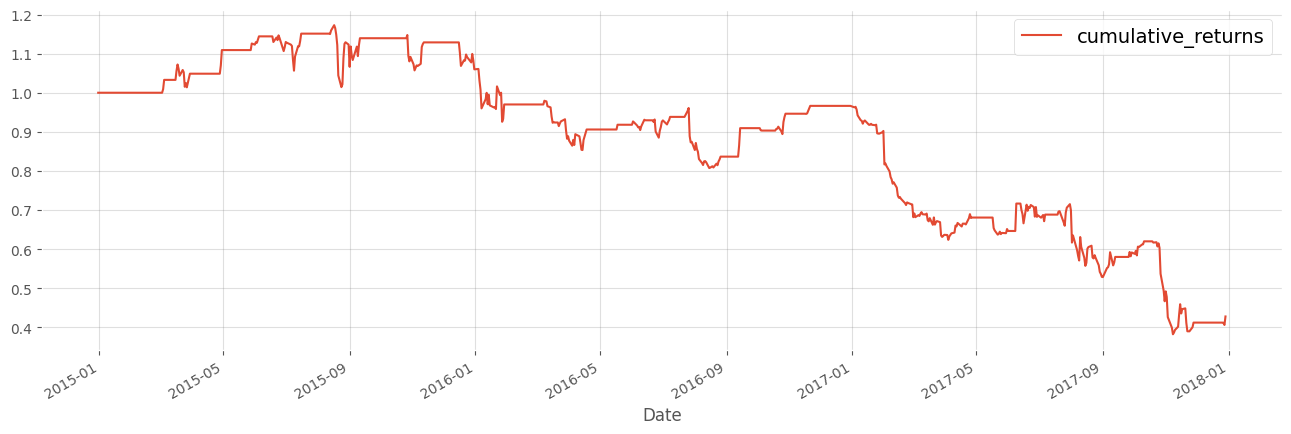

In [17]:
print(portfolio['cumulative_returns'].tail(1))
portfolio[['cumulative_returns']].plot(figsize = (16, 5))

### <font color = red> Answer 3 </font>

    The answer is -58 % .

### <font color = blue> 👉 Question 4</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [18]:
def compute_drawdown(
    df: pd.DataFrame
    ) -> dict[float, float]:
    df['max_gross_return'] = df['cumulative_returns'].cummax()
    df['drawdown'] = (df['cumulative_returns'] / df['max_gross_return']) - 1

    drawdown_reset = df[df['drawdown'] == 0].index
    drawdown_reset = (
        np.append(
            drawdown_reset,
            df.index[-1:]
        )
    )

    drawdowns = {}
    for i in range(1, len(drawdown_reset)):
        filtered_df = (
            df
            [
                (df.index >= drawdown_reset[i-1])
                &
                (df.index <= drawdown_reset[i])
            ]
        )
        
        mdd = filtered_df['drawdown'].min()
        duration = (drawdown_reset[i] - drawdown_reset[i-1]) / np.timedelta64(1, 'D')

        drawdowns[mdd] = duration
    
    sorted_drawdown = dict(sorted(drawdowns.items()))
    
    return sorted_drawdown


In [19]:
drawdowns = compute_drawdown(portfolio)

In [20]:
counter = 0
for i, j in drawdowns.items():
    if counter !=5:
        print(f'{counter+1} worst drawdown period: Net drawdown {round(i*100, 2)}% | Duration: {int(j)} Days')
        counter +=1
    else:
        break

1 worst drawdown period: Net drawdown -67.42% | Duration: 865 Days
2 worst drawdown period: Net drawdown -7.88% | Duration: 22 Days
3 worst drawdown period: Net drawdown -5.45% | Duration: 43 Days
4 worst drawdown period: Net drawdown -1.26% | Duration: 7 Days
5 worst drawdown period: Net drawdown -0.26% | Duration: 4 Days


### <font color = red> Answer 4 </font>

    The Worst drawdown period     : Net drawdown ____________ % | Duration ____________ Days
    
    The 2nd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
     
    The 3rd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
         
    The 4th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
    
    The 5th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days

### <font color = blue> 👉 Question 5</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [21]:
portfolio['year'] = (
    portfolio.index.year
)

annual_returns = (
    portfolio
    .groupby('year')
    .agg(
        annual_returns = ('cumulative_returns', 'last'),
    )
    .apply(np.exp)
    .pct_change()
    .dropna()
)

annual_returns['average'] = annual_returns['annual_returns'].mean()
annual_returns['perform'] = (
    np.where(
        annual_returns['annual_returns'] < annual_returns['average'],
        -1,1
    )
)
annual_returns

,annual_returns,average,perform
year,,,
2015,0.061663,-0.148037,1
2016,-0.089249,-0.148037,1
2017,-0.416525,-0.148037,-1


### <font color = red> Answer 5 </font>

    Below average year(s) : 2016, 2017 
    
    Above average year(s) : 2015 
     

###  <font color = blue> 👉 Question 6. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [22]:
(
    portfolio['returns'].mean() 
    / 
    portfolio['returns'].std() 
    * 
    np.sqrt(252)
)

-0.7985815309554419

### <font color = red> Answer 6 </font>
    
    Sharpe ratio: -0.8
    

## 👇 <font color = "purple"> Bigger Question 7. ### 

### This bigger question is where you will execute a principal component analysis (PCA) based portfolio for asset allocation. 
<br>
    
### Go to [the list of SP 500 companies on Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).
    
    Step 1: Among the securities added to the S&P 500 component before January 2000, select the first 30 stocks. 
    
    Step 2: Your objective is to find the portfolio using PCA. Using what you learned in class, 
    identify the profile of each portfolio. 
    
    Step 3: Then backtest the performance of your portfolio, relative to the equal weight portfolio. 
    Here, as you learned in class, use 80% of your data for PCA and 20% for backtesting.
    
### <font color = "green"> NOTE: The investment horizon will be 20 years between 2000 and 2019    

### Below are the lines of code that lead to an answer:

In [23]:
sp = (
    pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    [0]
)

tickers = (
    sp
    [sp['Date added'] < '2000-01-01']
    .sort_values(by = 'Date added', ascending = True)
    ['Symbol']
    .head(30)
    .to_list()
)

stocks = (
    yf.download(
        tickers = tickers,
        start = '2000-01-01',
        end = '2019-12-31'
    )
    ['Adj Close']
)

[*********************100%***********************]  30 of 30 completed


In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
stocks_return = (
    stocks
    .pct_change(1)
)

stocks_return.head()

Ticker,CL,COP,CSX,CVS,DE,DTE,ED,EIX,ETN,ETR,...,MMM,PEG,PG,RTX,SLB,SO,SPGI,UNP,XEL,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04 00:00:00+00:00,-0.026105,-0.019310,-0.030303,-0.008265,-0.001458,0.002079,0.012963,0.009975,-0.034151,0.002475,...,-0.039735,0.007340,-0.019241,-0.041000,-0.013651,0.010989,-0.045990,-0.001451,0.023026,-0.019153
2000-01-05 00:00:00+00:00,-0.034020,-0.018284,0.020833,0.055000,0.023357,0.031120,0.045703,0.064197,0.008160,0.041975,...,0.028965,0.025501,-0.019025,-0.019812,-0.002307,0.051631,-0.013453,0.000000,0.038585,0.054515
2000-01-06 00:00:00+00:00,-0.002135,0.034384,0.044898,-0.071090,0.051355,-0.004024,0.001749,-0.002320,0.020683,-0.018957,...,0.080429,0.003552,0.046060,0.047872,0.068208,0.002584,-0.027273,0.061046,-0.009288,0.051698
2000-01-07 00:00:00+00:00,0.059893,0.000000,0.000000,0.023809,-0.001357,0.010101,0.006980,0.041860,0.030837,0.000000,...,0.019851,-0.007079,0.079954,0.039594,0.018398,0.018041,0.009346,-0.006849,0.000000,-0.002935


## Preprocessing

In [26]:
# Operational defition of outliers = data points beyond 3 SD

stocks_return = (
    stocks_return[stocks_return 
                        .apply(lambda x:(x - x.mean()
                                        ).abs() < (3 * x.std()
                                                  )
                              )
                        .all(1)
    ]
)

In [27]:
scaler = (
    StandardScaler()
    .fit(stocks_return)
)

scaled_stocks =\
(
    pd
    .DataFrame(scaler.fit_transform(stocks_return),
               columns = stocks_return.columns,
               index = stocks_return.index)
)

## Train Test Split

In [28]:
prop = int(len(scaled_stocks) * 0.80)

X_Train = scaled_stocks[    : prop] # First 80% of the data
X_Test  = scaled_stocks[prop:     ] # Remaining 20% of the data

X_Train_Raw = stocks_return[    :prop]
X_Test_Raw  = stocks_return[prop:    ]

## Modelling

In [29]:
pca = PCA()

PrincipalComponent = pca.fit(X_Train)

PrincipalComponent

PCA()

## Study PC components

In [30]:
NumEigenValues = 10

<Axes: title={'center': 'Cumulative Explained Variance by Each PC'}>

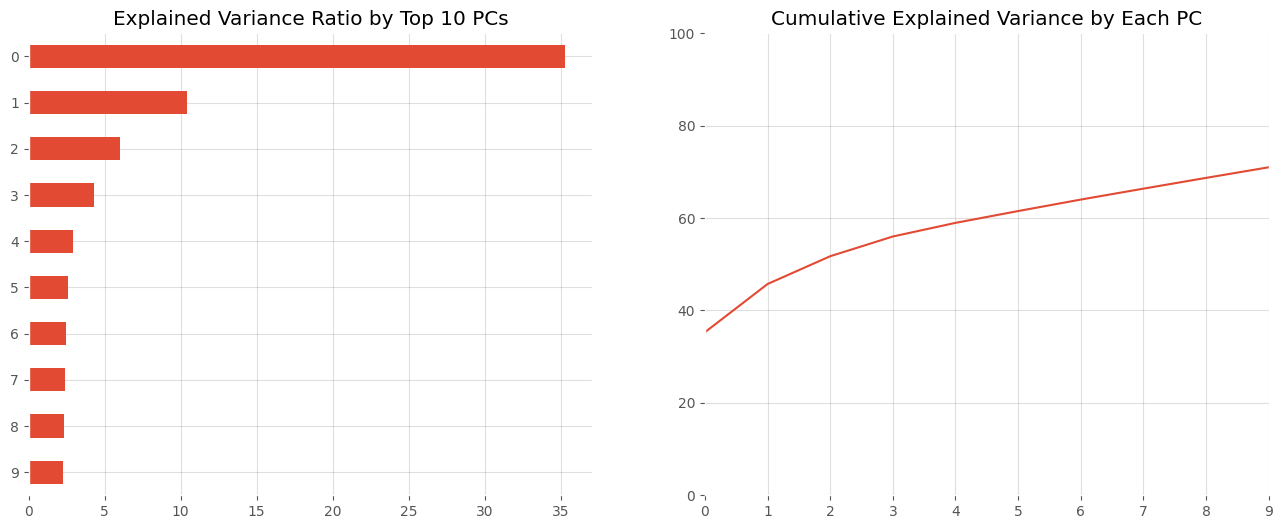

In [31]:
fig, axes =\
(
    plt
    .subplots(ncols = 2,
              figsize = [16, 6]
             )
)

# Plot on the left panel

Series1 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .sort_values()
    * 100
)

# Plot on the right panel

Series2 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .cumsum()
    * 100
)

(
    Series1
    .plot
    .barh(ylim = (0, 9),
          title = "Explained Variance Ratio by Top 10 PCs",
          ax = axes[0]
         )
)

(
    Series2
    .plot(ylim = (0, 100),
          xlim = (0, 9),
          title = "Cumulative Explained Variance by Each PC",
          ax = axes[1]
         )
)

## Portfolio Weights

In [32]:
def PCWeights():

    weights = pd.DataFrame()

    for i in range(len(pca.components_)
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T
    return weights 

In [33]:
weights = PCWeights()
weights[0]

array([0.028, 0.033, 0.036, 0.026, 0.033, 0.037, 0.033, 0.03 , 0.04 ,
       0.034, 0.033, 0.029, 0.034, 0.035, 0.025, 0.03 , 0.036, 0.026,
       0.032, 0.035, 0.039, 0.037, 0.03 , 0.039, 0.033, 0.032, 0.032,
       0.037, 0.035, 0.039])

In [34]:
# Set the number of principal components to be considered
NumComponents = 5

# Extract the top principal components from the PCA object
# and create a DataFrame with columns named after the original features

topPortfolios =\
(
    pd
    .DataFrame(pca.components_[ : NumComponents],
               columns = stocks.columns)
)

# Normalize the weights of the top portfolios such that the weights sum up to 1 for each portfolio
# This is done by dividing each weight by the sum of weights for the respective portfolio

eigen_portfolios =\
(
    topPortfolios
    .div(topPortfolios.sum(1),
         axis = 0)
)

# Rename the index of the eigen_portfolios DataFrame for better readability

eigen_portfolios.index = [f"Portfolio {i}" for i in range(NumComponents)
                         ]

# Calculate the square root of the explained variance for each component
# This provides the standard deviation of returns for each eigenportfolio

np.sqrt(pca.explained_variance_)

array([3.33 , 1.81 , 1.374, 1.158, 0.962, 0.896, 0.883, 0.862, 0.855,
       0.849, 0.83 , 0.815, 0.791, 0.773, 0.76 , 0.749, 0.735, 0.72 ,
       0.684, 0.663, 0.66 , 0.656, 0.636, 0.616, 0.594, 0.581, 0.538,
       0.527, 0.514, 0.507])

array([[<Axes: title={'center': 'Portfolio 0'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 1'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 2'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 3'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 4'}, xlabel='Ticker'>]],
      dtype=object)

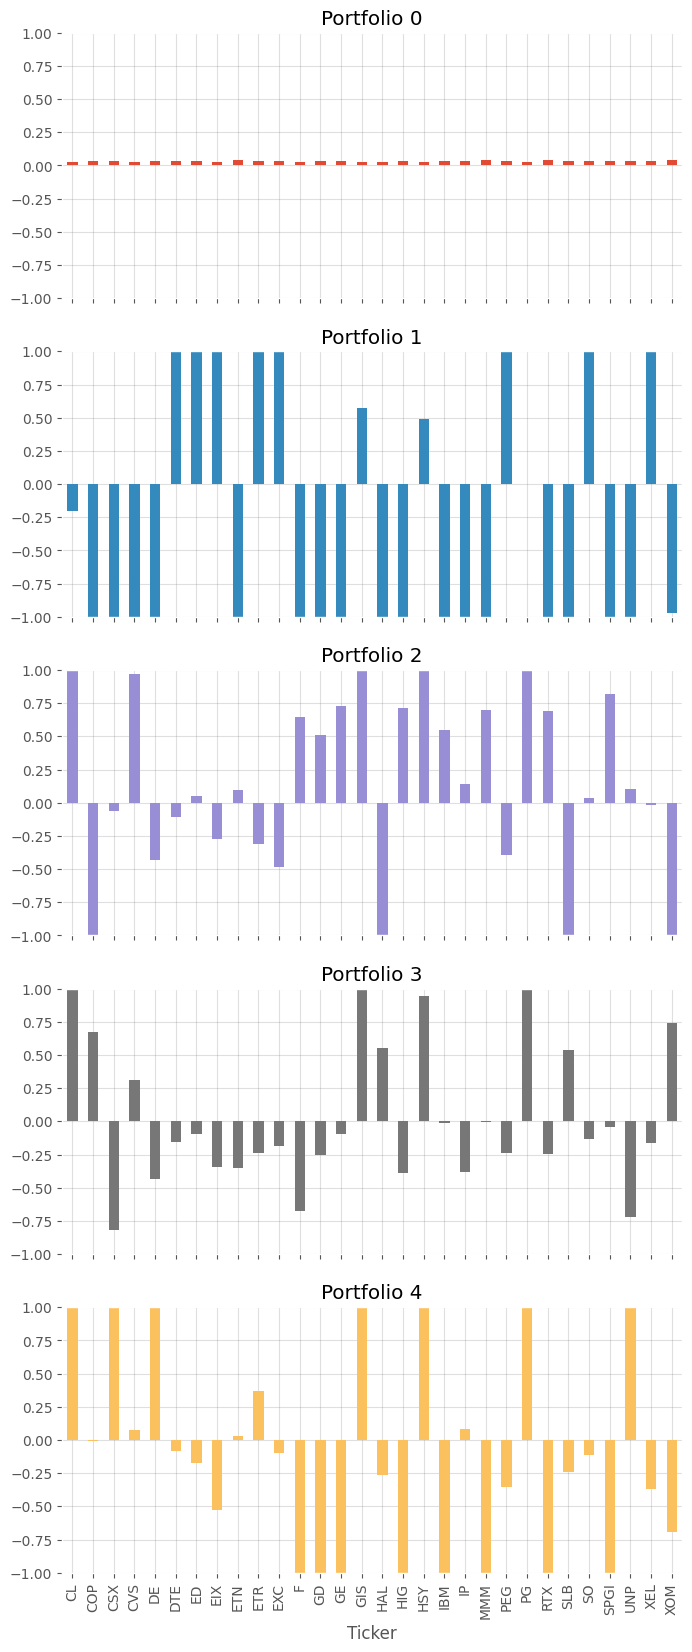

In [35]:
(
    eigen_portfolios
    .T  # Transpose the DataFrame to have portfolios as columns and assets as rows
    .plot
    .bar(subplots = True,
         layout = (int(NumComponents), 1),
         legend = False,
         sharey = True,
         figsize = [8, 20],
         ylim = [-1, 1]
        )
)

## Backtesting

In [36]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [37]:
def valid_backtest_PCA_porfolios(eigen):
    
    eigen_prtfi =\
        (
            pd
            .DataFrame(data = {"weights": eigen.squeeze()
                              },
                       index = stocks.columns)
        )

    # Sanity Check: Ensure the order of tickers in X_Test_Raw matches the order in eigen
    if not list(eigen_prtfi.index) == list(X_Test_Raw.columns): 
        raise ValueError("Sanity check failed: Mismatch in number of tickers between X_Test_Raw and eigen.")
    else:
        print("Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.")
    
    # Let's directly compute the dot product without sorting
    eigen_prtfi_returns =\
    (
        np
        .dot(X_Test_Raw, eigen)
    )
    
    eigen_portfolio_returns =\
    (
        pd
        .Series(eigen_prtfi_returns.squeeze(),
                index = X_Test_Raw.index)
    )

    returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
          (returns * 100, vol * 100, sharpe)
         )

    # Compared with what? Equal-weightage Portfolio

    equal_weight_return =\
    (
        X_Test_Raw * (1 / len(pca.components_)
                     )
    ).sum(axis = 1)

    df_plot =\
        (
            pd
            .DataFrame({"ML Portfolio Return": eigen_portfolio_returns,
                        "Equal Weight Index": equal_weight_return},
                      index = X_Test.index
                      )
        )

    (
        np
        .cumprod(df_plot + 1)
        .plot(title = "Returns of the equal weighted index vs. Eigen-Portfolio",
              figsize = [16, 4]
             )
    )

    plt.show()

### <font color = red> Answer 7 is presented in the cell below: </font>

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = 19.60%
Volatility = 9.45%
Sharpe = 2.07


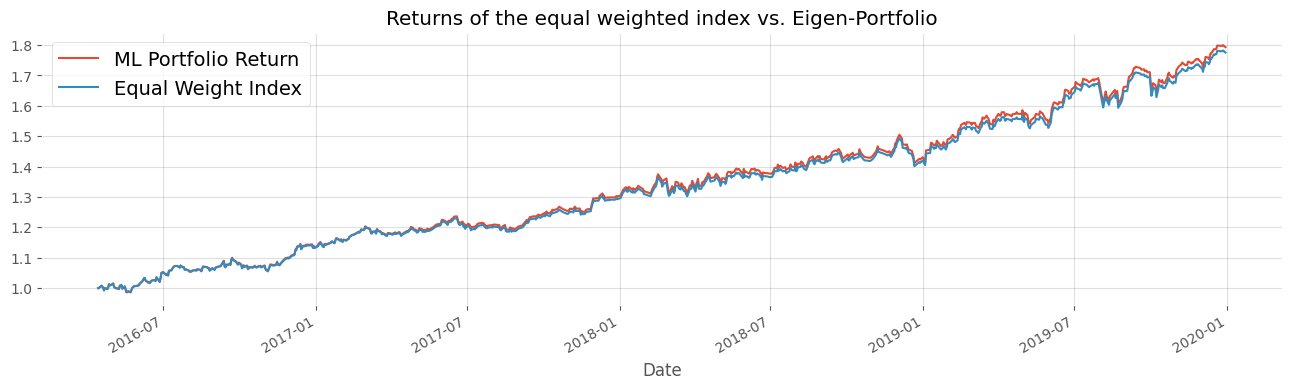

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = -100.00%
Volatility = 630.27%
Sharpe = -0.16


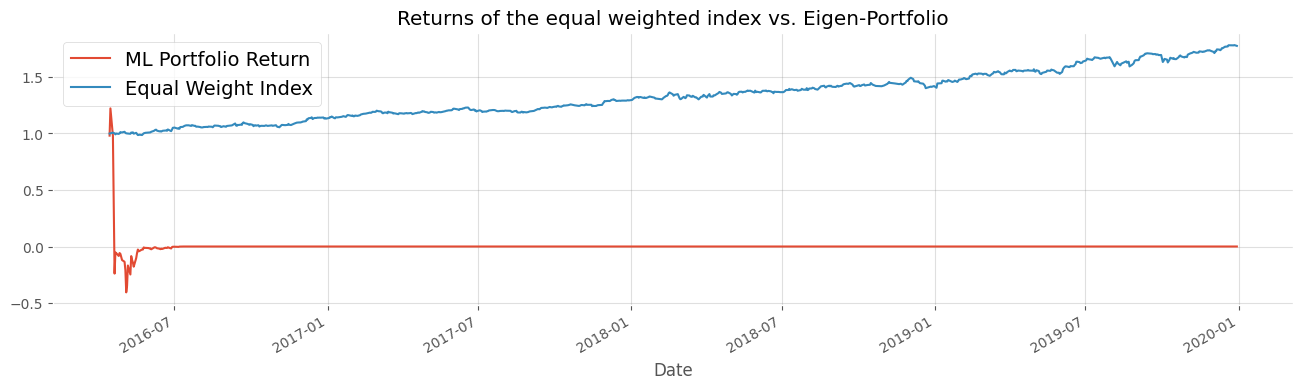

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = -58.98%
Volatility = 188.13%
Sharpe = -0.31


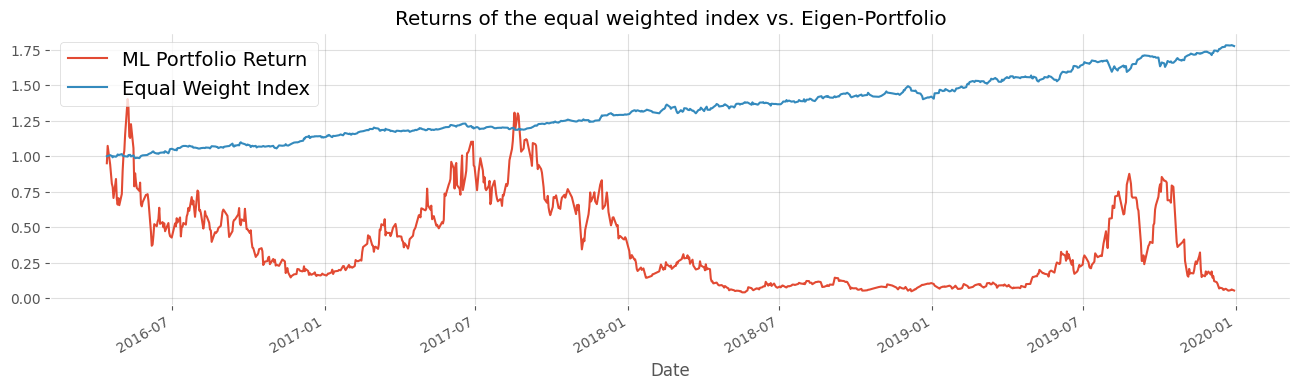

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = -52.84%
Volatility = 61.41%
Sharpe = -0.86


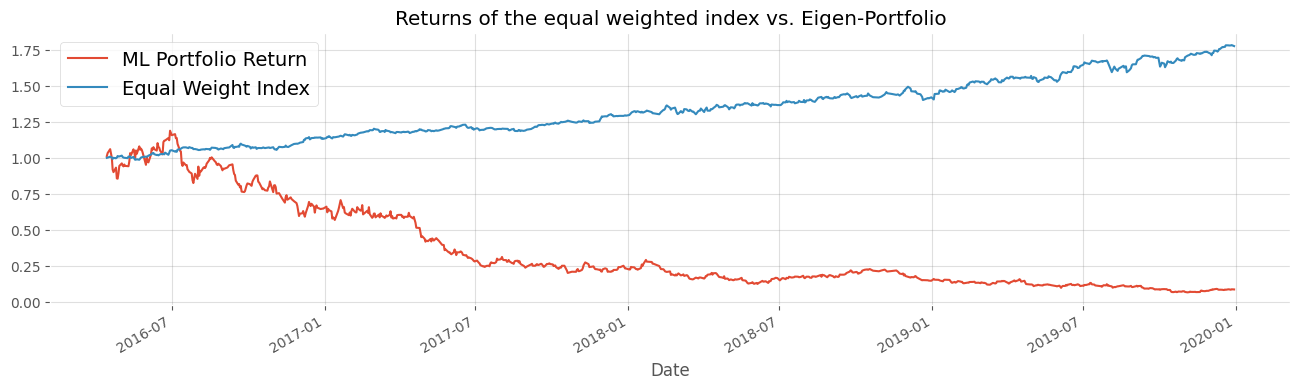

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = -63.18%
Volatility = 277.49%
Sharpe = -0.23


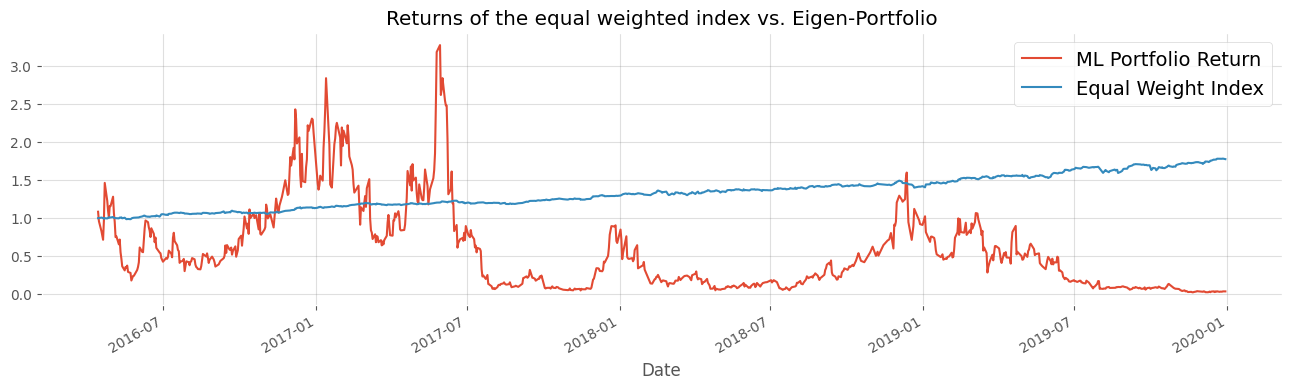

In [38]:
for i in range(NumComponents):

    valid_backtest_PCA_porfolios(
        eigen = weights[i]
)

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊